[([5.1, 6.2], 'Triangle'), ([7.5, 5.5], 'Triangle')]
0
--- Triangle ---
False


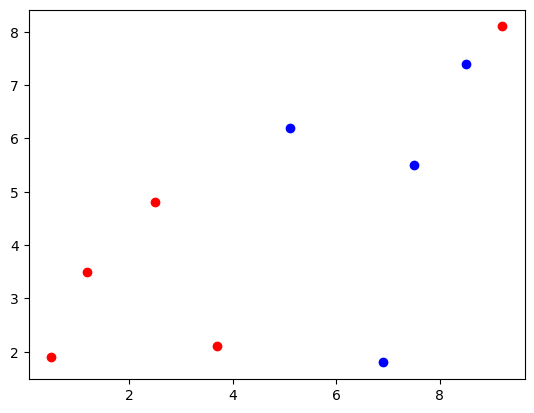

In [1]:
from ipynb.fs.full.quick_certify import nearNeighborsSet, mostFreqLabel

In [19]:
import itertools

def generateSubsetsR1(data, k, input_x, n, min_rmv=0):
    """
    Generates all subsets of the input_set.
    
    Returns:
        list: A list of sets representing all subsets of the input_set.
    """
    
    input_set = nearNeighborsSet(data = data, k = k, input_x = input_x, n = n)
    
    all_subsets = []
    taille = len(input_set)
    for k in range(min_rmv, taille + 1):
        # Generate all combinations of size k from the input_set
        
        subsets_of_size_k = itertools.combinations(input_set, k)
        all_subsets.extend(map(list, subsets_of_size_k))
        
    return all_subsets


# data = [
#     ([1.2, 3.5], 'Star'),
#     ([2.5, 4.8], 'Star'),
#     ([3.7, 2.1], 'Star'),
#     ([5.1, 6.2], 'Triangle'),
#     ([6.9, 1.8], 'Triangle'),
#     ([7.5, 5.5], 'Triangle'),
#     ([9.2, 8.1], 'Star'),
#     ([8.5, 7.4], 'Triangle'),
#     ([0.5, 1.9], 'Star')
# ]
# n = 2
# k = 2
# input_x = [5, 4.5]
# resulting_subsets = generateSubsetsR1(data, k, input_x, n=1)
# for subset in resulting_subsets:
#     print(subset)


In [47]:
import numpy as np
import itertools
import copy  # Assuming you need to create a deep copy

def generateSubsetsR2(data, k, input_x, n, len_r2):
    """
    Generates all subsets of the input_set.

    Returns:
        list: A list of sets representing all subsets of the input_set.
    """

    nearDataSet = nearNeighborsSet(data=data, k=k, input_x=input_x, n=n)
    
    # input_set = [x for x in data if not np.any(x == element for element in nearDataSet)]
    # input_set = [x for x in data if not np.any(set(x) == set(element) for element in nearDataSet)]
    input_set = [x for x in data if not any(np.array_equal(x[0], element[0]) and x[1] == element[1] for element in nearDataSet)]

    all_subsets = []

    for incre in range(1, n - len_r2 + 1):
        print('incre')
        # Generate all combinations of size k from the input_set using itertools.combinations
        subsets_of_size_k = itertools.combinations(input_set, incre)
        all_subsets.extend(map(list, subsets_of_size_k))

    return all_subsets

# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)

# # Créer une liste de paires (x, y) à partir de X et y
# xy = list(zip(X, y))
data = [
    ([1.2, 3.5], 'Star'),
    ([2.5, 4.8], 'Star'),
    ([3.7, 2.1], 'Star'),
    ([5.1, 6.2], 'Triangle'),
    ([6.9, 1.8], 'Triangle'),
    ([7.5, 5.5], 'Triangle'),
    ([9.2, 8.1], 'Star'),
    ([8.5, 7.4], 'Triangle'),
    ([0.5, 1.9], 'Star')
]

print(generateSubsetsR2(data, 2, [9.2, 8.1], 2, len_r2=1))


incre
[[([1.2, 3.5], 'Star')], [([2.5, 4.8], 'Star')], [([3.7, 2.1], 'Star')], [([6.9, 1.8], 'Triangle')], [([0.5, 1.9], 'Star')]]


[([1.2, 3.5], 'Star'), ([2.5, 4.8], 'Star'), ([3.7, 2.1], 'Star'), ([5.1, 6.2], 'Triangle'), ([6.9, 1.8], 'Triangle'), ([7.5, 5.5], 'Triangle'), ([9.2, 8.1], 'Star'), ([8.5, 7.4], 'Triangle'), ([0.5, 1.9], 'Star')]
incre
incre
incre
incre
[([1.2, 3.5], 'Star'), ([2.5, 4.8], 'Star'), ([3.7, 2.1], 'Star'), ([6.9, 1.8], 'Triangle'), ([7.5, 5.5], 'Triangle'), ([9.2, 8.1], 'Star'), ([8.5, 7.4], 'Triangle')]


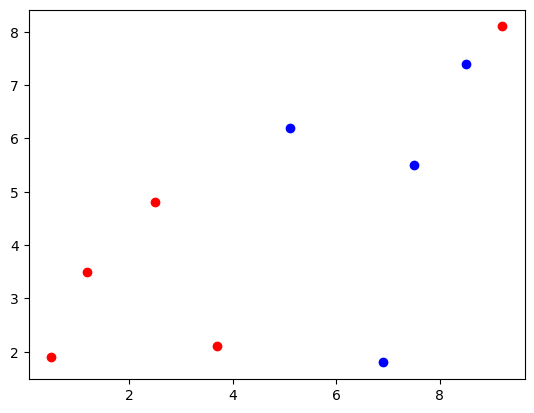

incre
incre
incre
incre


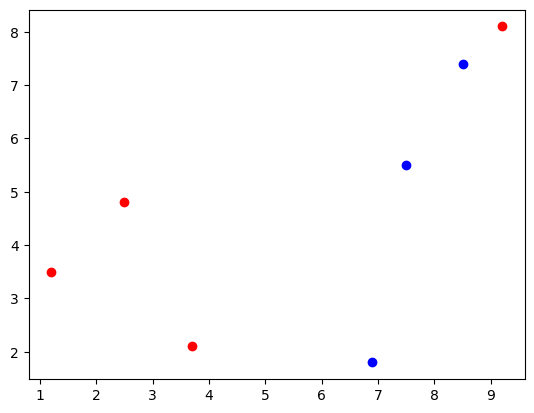

In [50]:
def GenPromisingSubset(data, n, x, y):
    Kset = [2]
    reduced_set = []

    for k in Kset:
        start = 0
        end = n+1
        
        while start < end:
            mid = (start + end) // 2 # On prend la partie entiere du milieu
            # print('mid = ', mid)
            # print(k, "/", x, "/",  y, "/", mid)
            # print(y, mostFreqLabel(data=data, k=k, input_x=x, y=y, n=mid))
            if y != mostFreqLabel(data=data, k=k, input_x=x, y=y, n=mid):
                end = mid
                # print('end = ', end)
            else:
                start = mid + 1
                # print('start = ', start)
        
        min_rmv = start
        # print(min_rmv, n)
        # print(type(min_rmv), type(n))
        # print(min_rmv <= n)
        if (min_rmv <= n):
            # print('first step')
            
            for subsetR1 in generateSubsetsR1(data, k, x, n=n, min_rmv=min_rmv):
                # print('subset1 = ', subsetR1)
                # print(generateSubsetsR2(data, k, x, n, len_r2=len(subsetR1)))
                for subsetR2 in generateSubsetsR2(data, k, x, n, len_r2=len(subsetR1)):
                    R = subsetR1 + subsetR2
                    # print(R)
                    # print(R)
                    reduced_set = [w for w in data if w not in R]

    return reduced_set

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Créer une liste de paires (x, y) à partir de X et y
xy = list(zip(X, y))
# print((xy))

data = [
    ([1.2, 3.5], 'Star'),
    ([2.5, 4.8], 'Star'),
    ([3.7, 2.1], 'Star'),
    ([5.1, 6.2], 'Triangle'),
    ([6.9, 1.8], 'Triangle'),
    ([7.5, 5.5], 'Triangle'),
    ([9.2, 8.1], 'Star'),
    ([8.5, 7.4], 'Triangle'),
    ([0.5, 1.9], 'Star')
]

print(data)

# Afficher les 5 premières paires
print(GenPromisingSubset(data=data, n=2, x=[9.2, 8.1], y='Star'))

import matplotlib.pyplot as plt

data = [
    ([1.2, 3.5], 'Star'),
    ([2.5, 4.8], 'Star'),
    ([3.7, 2.1], 'Star'),
    ([5.1, 6.2], 'Triangle'),
    ([6.9, 1.8], 'Triangle'),
    ([7.5, 5.5], 'Triangle'),
    ([9.2, 8.1], 'Star'),
    ([8.5, 7.4], 'Triangle'),
    ([0.5, 1.9], 'Star')
]

for point in data:
    if point[1] == 'Star':
        plt.scatter(point[0][0], point[0][1], color='red')
    elif point[1] == 'Triangle':
        plt.scatter(point[0][0], point[0][1], color='blue')
    elif point[1] == 'Square':
        plt.scatter(point[0][0], point[0][1], color='green')

plt.show()


for point in GenPromisingSubset(data=data, n=2, x=[9.2, 8.1], y='Star'):
    if point[1] == 'Star':
        plt.scatter(point[0][0], point[0][1], color='red')
    elif point[1] == 'Triangle':
        plt.scatter(point[0][0], point[0][1], color='blue')
    elif point[1] == 'Square':
        plt.scatter(point[0][0], point[0][1], color='green')

plt.show()


In [25]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Créer une liste de paires (x, y) à partir de X et y
xy = list(zip(X, y))
# print((xy))

# Afficher les 5 premières paires
print(GenPromisingSubset(data=xy, n=2, input_x=[5.1, 3.5, 1.4, 0.2], y=0))


[]


In [11]:
import numpy as np

# Créer les objets numpy A et B
A = np.array([1, 2, 3, 4, 5])
B = np.array([3, 5, 7, 9])

# Trouver les éléments de A qui ne sont pas dans B
result = np.setdiff1d(A, B)

# Afficher le résultat
print(np.array_equal(np.array([1, 2]), np.array([1, 2])))

True
